Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Einlesen CSV-Datei

In [3]:
df = pd.read_csv('telco_churn.csv', index_col=0, sep = ';')
df.drop(columns = 'Count', inplace = True)
df.head()

,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,United States,California,NaN,NaN,"33,964131","-118,272783",Male,No,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,"53,85","108,15",86.0,3239.0
9237-HQITU,United States,California,Los Angeles,90005.0,"34,059281","-118,307420",Female,No,No,Yes,...,No,NaN,No,Month-to-month,Yes,Electronic check,"70,7","151,65",NaN,2701.0
9305-CDSKC,United States,California,Los Angeles,90006.0,"34,048013","-118,293953",Female,No,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,"99,65","820,5",86.0,5372.0
7892-POOKP,United States,California,Los Angeles,90010.0,"34,062125","-118,315709",Female,No,Yes,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,"104,8","3046,05",84.0,5003.0
0280-XJGEX,United States,California,Los Angeles,90015.0,"34,039224","-118,266293",Male,No,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),"103,7","5036,3",89.0,NaN


Zuweisung von Category, wo sinnvol

In [4]:
df.Country = df.Country.astype('category')
df.State = df.State.astype('category')
df['Zip Code'] = df['Zip Code'].astype('category')
cols = []
for i in range(6,23):
    cols.append(df.columns[i])
    for col in cols:
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Country            7043 non-null   category
 1   State              6001 non-null   category
 2   City               6237 non-null   object  
 3   Zip Code           5986 non-null   category
 4   Latitude           6081 non-null   object  
 5   Longitude          6390 non-null   object  
 6   Gender             7043 non-null   category
 7   Senior Citizen     7043 non-null   category
 8   Partner            7043 non-null   category
 9   Dependents         7043 non-null   category
 10  Tenure Months      5900 non-null   category
 11  Phone Service      7043 non-null   category
 12  Multiple Lines     7043 non-null   category
 13  Internet Service   6313 non-null   category
 14  Online Security    7043 non-null   category
 15  Online Backup      7043 non-null   category
 

Visualisierung

['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
0
0
0
0
1143
0
0
730
0
0
1150
0
1167
0
731
0
0


array([[<Axes: title={'center': 'Churn Score'}>,
        <Axes: title={'center': 'CLTV'}>]], dtype=object)

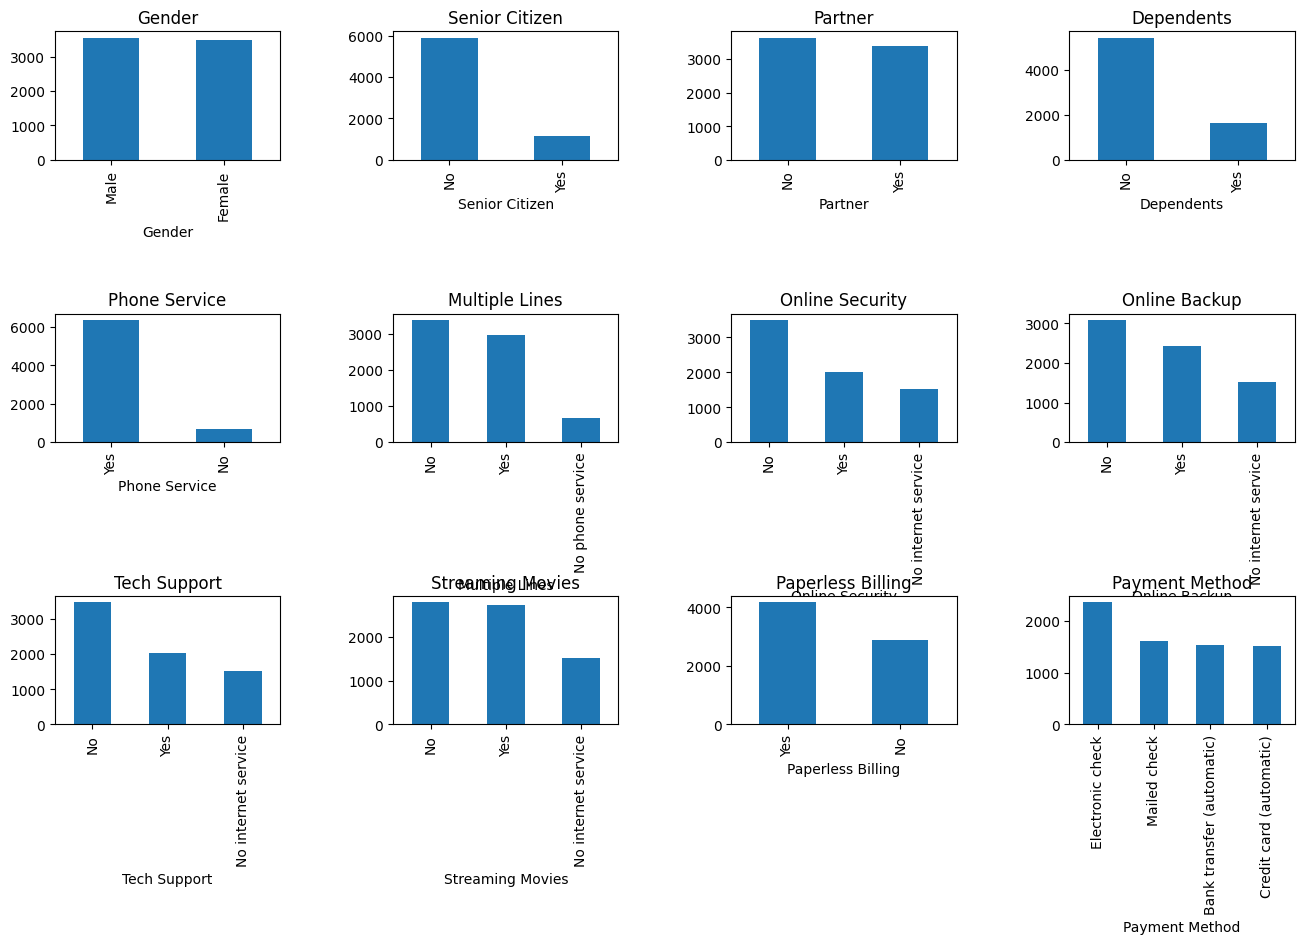

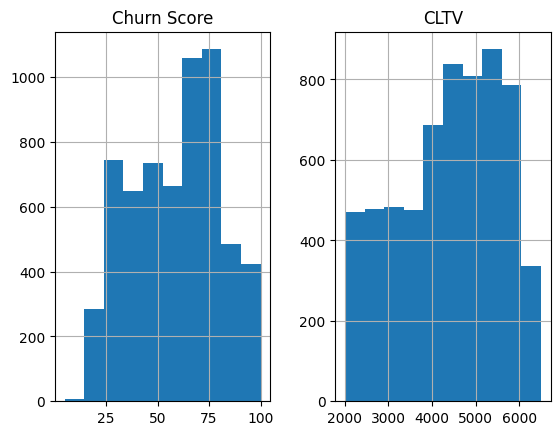

In [84]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,9))
plt.subplots_adjust(wspace=0.5, hspace=1.2)

# z zählt plots
z = 0
i = 6
print(cols)
for col in cols:
    print(df[col].isnull().sum())
    if df[col].isnull().sum() == 0:
        df.iloc[:,i].value_counts().plot(ax=axes[int(z/4),z%4], kind='bar', title=df.columns[i],)
    else :
        z -= 1
    i += 1
    z += 1
df.hist()